In [3]:
predicted_images_path = './U-2-Net/test_data/u2net_finetuned_results/'
ground_truth_images_path = './U-2-Net/test_data/ground_truth/'

import os
from PIL import Image
import numpy as np
import glob

In [7]:
img_name_list = glob.glob(os.path.join(predicted_images_path, '*.png'))
prediction_dir = predicted_images_path
# from u2net_test
# --------- 5. calculate IoU ---------
def iou(pred, target):
    pred = pred.squeeze().astype(bool)
    target = target.squeeze().astype(bool)

    intersection = np.logical_and(target, pred)
    union = np.logical_or(target, pred)
    iou_score = np.sum(intersection) / np.sum(union)
    return iou_score

IoU_scores = []
for i, image_path in enumerate(img_name_list):
    image_name = image_path.split(os.sep)[-1].replace('.jpg', '.png')
    prediction_path = os.path.join(prediction_dir, image_name)
    prediction = Image.open(prediction_path).convert('L')
    prediction = np.array(prediction)
    prediction = np.where(prediction > 127, 1, 0)
    
    ground_truth_path = os.path.join(ground_truth_images_path, image_name)
    ground_truth = Image.open(ground_truth_path)
    ground_truth = np.array(ground_truth)
    ground_truth = np.where(ground_truth > 127, 1, 0)
    
    IoU_scores.append(iou(prediction, ground_truth))

print(f"Mean IoU: {np.mean(IoU_scores)}")
print(f"Median IoU: {np.median(IoU_scores)}")
print(f"Max IoU: {np.max(IoU_scores)}")
print(f"Min IoU: {np.min(IoU_scores)}")

Mean IoU: 0.9940997593659155
Median IoU: 0.9986271002463436
Max IoU: 1.0
Min IoU: 0.4420010288065844


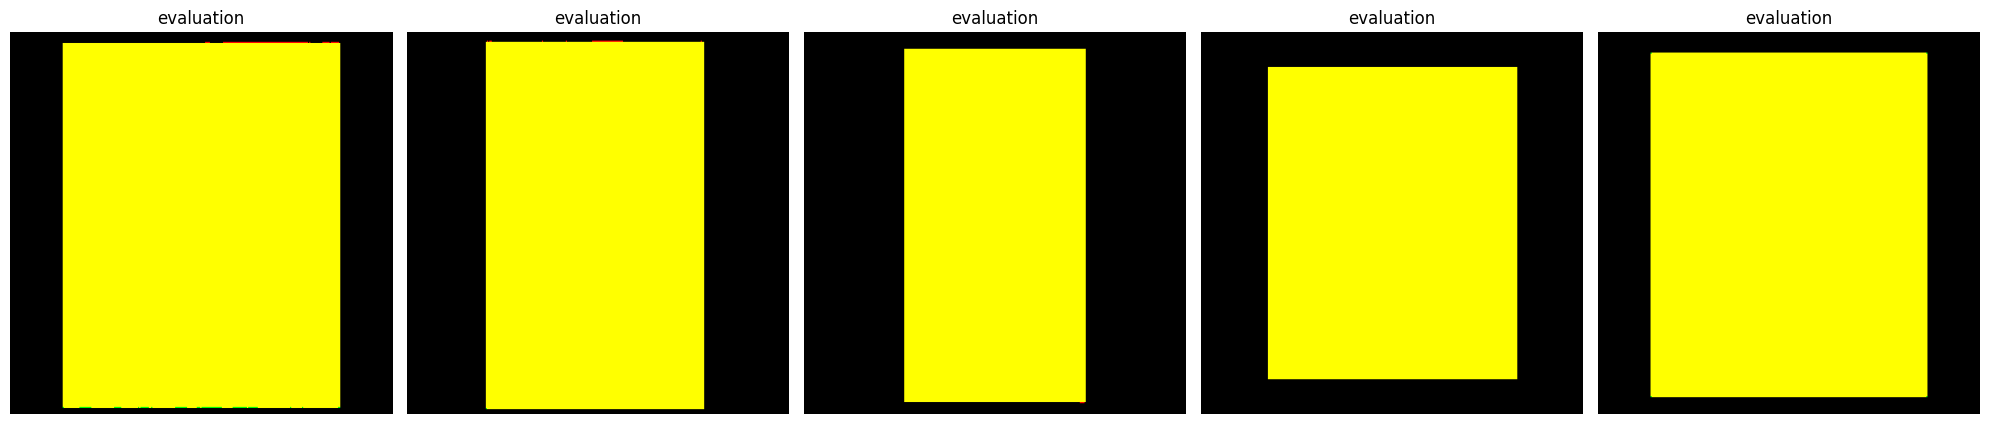

In [47]:
# human eye check
import matplotlib.pyplot as plt
import random

random_indices = random.sample(range(len(img_name_list)), 5)
fig, axs = plt.subplots(1, 5, figsize=(20, 20))

for i, idx in enumerate(random_indices):
    image_path = img_name_list[idx]
    image_name = image_path.split(os.sep)[-1].replace('.jpg', '.png')
    prediction_path = os.path.join(prediction_dir, image_name)
    prediction = Image.open(prediction_path).convert('L')
    prediction = np.array(prediction)
    prediction = np.where(prediction > 127, 255, 0)

    ground_truth_path = os.path.join(ground_truth_images_path, image_name)
    ground_truth = Image.open(ground_truth_path)
    ground_truth = np.array(ground_truth)
    ground_truth = np.where(ground_truth > 127, 255, 0)
    
    eval_image = np.zeros((prediction.shape[0], prediction.shape[1], 3), dtype=np.uint8)
    # set ground truth to green and prediction to red
    eval_image[:, :, 0] = prediction
    eval_image[:, :, 1] = ground_truth

    axs[i].imshow(eval_image)
    axs[i].set_title('evaluation')
    axs[i].axis('off')




plt.tight_layout()
plt.show()